In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt



In [2]:
import sklearn
sklearn.__version__

'0.21.1'

In [3]:
result_dict = {}

In [4]:
def summarise_classification(Y_test,Y_pred):
    
    acc = accuracy_score(Y_test,Y_pred,normalize=True)
    prec = precision_score(Y_test,Y_pred)
    rec = recall_score(Y_test,Y_pred)
    roc = roc_auc_score(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    acc_count = accuracy_score(Y_test,Y_pred,normalize=False)
    model_crosstab = pd.crosstab(Y_test,Y_pred)
    #return {'accuracy':acc,'precision':prec,'recall':rec ,'AUC':roc,'accuracy_count':acc_count,'r2Score':r2,'mean_squared_error':mse,'confusionmatrix':model_crosstab}
    return {'accuracy':acc,'confusionmatrix':model_crosstab}


In [5]:
def buildModel(class_fn,X,Y,test_frac=0.2):
        
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=test_frac,random_state=11)
    model = class_fn(X_train,Y_train)
    
    Y_pred_train = model.predict(X_train)
    Y_pred = model.predict(X_test)
    
    
    train_summary = summarise_classification(Y_train,Y_pred_train)
    test_summary = summarise_classification( Y_test,Y_pred)
    
    pred_result = pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_pred})    
    
    
    return model,{'training':train_summary,'test':test_summary}

In [6]:

#label_encoding.classes_

In [7]:
def compare_results():
    for key in result_dict:
        print ('Classification: ',key)
        print()
        print('Training data')
        for scorekey in result_dict[key]['training']:
            print(scorekey,': ',result_dict[key]['training'][scorekey])
            
        print()
        print('Test data')
        for scorekey in result_dict[key]['test']:
            print(scorekey, ': ' ,result_dict[key]['test'][scorekey])
        
        print()
        

In [8]:
def decision_tree_fn(x_train,y_train,maxdepth=None,maxfeatures=None):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=maxdepth,max_features=maxfeatures)
    start_time = time.time()
    model.fit(x_train,y_train)
    print("training time base model: ",(time.time() - start_time) ," seconds")
    return model


In [9]:
#dfAdult = pd.read_csv("D:\\Personal\\Personal\\OMSCS\\MachineLearning\\RawData\\CensusData\\adult\\adult.csv")
dfAdult = pd.read_csv(".\\data\\adult.csv")

# reshuffle input data ..good thing for neural netwrok
#dfAdult = dfAdult.sample(frac=1).reset_index(drop=True) 

dfAdultHotEncoded = pd.get_dummies(dfAdult,columns=['salary','education','workclass','occupation','relationship','marital-status','race','sex'])
dfAdultHotEncoded = dfAdultHotEncoded.drop(columns=['salary_ <=50K','native-country'])
X_HotEncoded = dfAdultHotEncoded.drop('salary_ >50K',axis=1)
Y_HotEncoded = dfAdultHotEncoded['salary_ >50K']

label_encoding = preprocessing.LabelEncoder()
dfAdult['salary'] = label_encoding.fit_transform(dfAdult['salary'])
dfAdult['education'] = label_encoding.fit_transform(dfAdult['education'])
dfAdult['workclass'] = label_encoding.fit_transform(dfAdult['workclass'])
dfAdult['occupation'] = label_encoding.fit_transform(dfAdult['occupation'])
dfAdult['relationship'] = label_encoding.fit_transform(dfAdult['relationship'])
dfAdult['marital-status'] = label_encoding.fit_transform(dfAdult['marital-status'])
dfAdult['race'] = label_encoding.fit_transform(dfAdult['race'])
dfAdult['sex'] = label_encoding.fit_transform(dfAdult['sex'])
dfAdult['native-country']=label_encoding.fit_transform(dfAdult['native-country'])

X = dfAdult.drop('salary',axis=1)
Y = dfAdult['salary']
print(X.columns)
print(X.shape)

print(Y.shape)


#X=X_HotEncoded
#Y=Y_HotEncoded
#X = X[:, None]


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 14)
(32561,)


In [10]:
"""
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#sphx-glr-auto-examples-model-selection-plot-learning-curve-py 
"""
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #fit_times_mean = np.mean(fit_times, axis=1)
    #fit_times_std = np.std(fit_times, axis=1)
  
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")
    """
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    """
    return plt


training time base model:  0.5574462413787842  seconds
Classification:  DT_Adult

Training data
accuracy :  0.9999616093366094
confusionmatrix :  col_0       0     1
salary             
0       19705     0
1           1  6342

Test data
accuracy :  0.8151389528635038
confusionmatrix :  col_0      0    1
salary           
0       4405  610
1        594  904

depth of tree: 59
number of leaves 3748


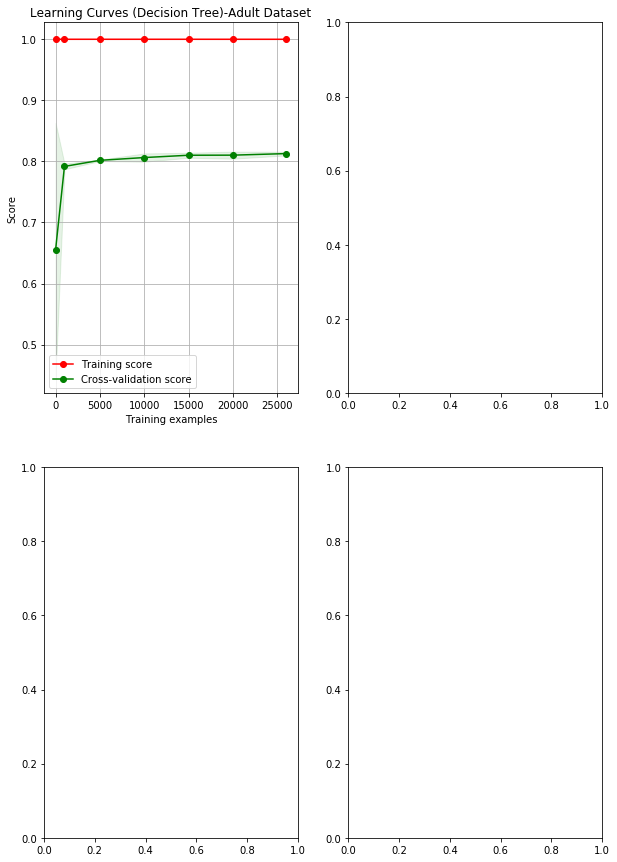

depth of tree: 59
number of leaves 3748


In [11]:
result_dict ={}
model,result_dict['DT_Adult'] = buildModel(decision_tree_fn,X,Y)
compare_results()
print("depth of tree:" ,model.get_depth())
print("number of leaves",model.get_n_leaves())

train_sizes = [1, 1000,5000, 10000, 15000, 20000, 26000]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Decision Tree)-Adult Dataset"

plot_learning_curve(model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()
print("depth of tree:" ,model.get_depth())
print("number of leaves",model.get_n_leaves())

In [12]:
from sklearn.model_selection import GridSearchCV

def grid_searchCV(X,Y,params,cv):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=11)
    parameters = params
    grid_search=(GridSearchCV(DecisionTreeClassifier(criterion='entropy'),parameters,cv=cv,return_train_score=True))
    start_time = time.time()
    grid_search.fit(X_train,Y_train)
    print("hypeparameter tuning time:",(time.time()-start_time),"seconds")
    count = 1
    for x in parameters: 
        if isinstance(parameters[x], list): 
            count *= len(parameters[x]) 

    for i in range(count):
        print('parameters: ',grid_search.cv_results_['params'][i])
        print('mean_test_score: ',grid_search.cv_results_['mean_test_score'][i])
        print('rank: ',grid_search.cv_results_['rank_test_score'][i])    

    Y_pred = grid_search.predict(X_test)
    print(summarise_classification(Y_test,Y_pred))
    return grid_search

hypeparameter tuning time: 5.955291986465454 seconds
parameters:  {'max_depth': 1}
mean_test_score:  0.7564880221130221
rank:  7
parameters:  {'max_depth': 2}
mean_test_score:  0.824708230958231
rank:  6
parameters:  {'max_depth': 4}
mean_test_score:  0.8424831081081081
rank:  5
parameters:  {'max_depth': 5}
mean_test_score:  0.8453240171990172
rank:  4
parameters:  {'max_depth': 6}
mean_test_score:  0.8461302211302212
rank:  3
parameters:  {'max_depth': 8}
mean_test_score:  0.8517736486486487
rank:  1
parameters:  {'max_depth': 10}
mean_test_score:  0.8506987100737101
rank:  2
{'accuracy': 0.8602794411177644, 'confusionmatrix': col_0      0    1
salary           
0       4802  213
1        697  801}
adult max-depth:  8
training time best model:  0.23184609413146973
training data
{'accuracy': 0.8582232800982801, 'confusionmatrix': col_0       0     1
salary             
0       18861   844
1        2849  3494}
test data
{'accuracy': 0.860586519269154, 'confusionmatrix': col_0      0   

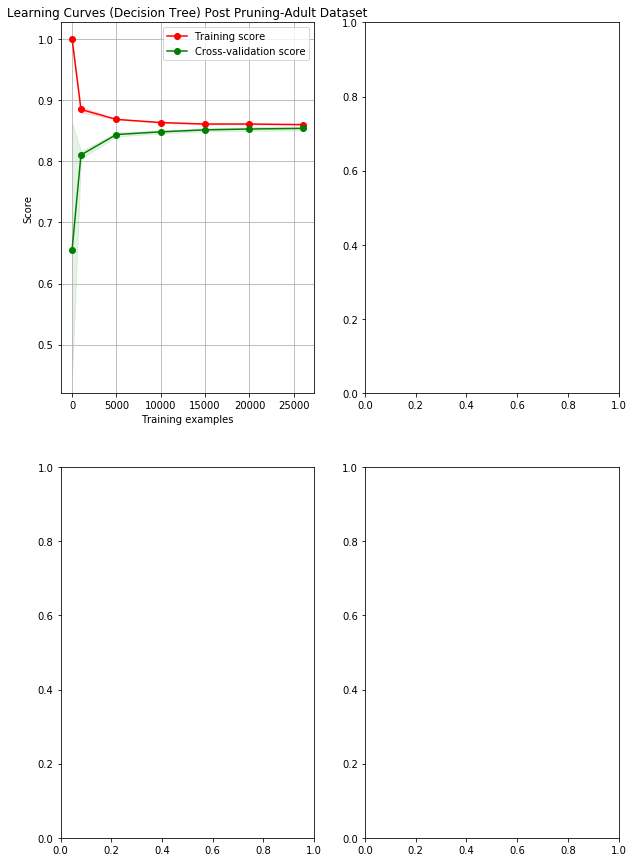

In [13]:
parameters ={'max_depth':[1,2,4,5,6,8,10]}
grid_search = grid_searchCV(X,Y,parameters,6)
print('adult max-depth: ',grid_search.best_params_['max_depth'])
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=grid_search.best_params_['max_depth'])
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=11)

start_time = time.time()
dt_model.fit(X_train,Y_train)
print("training time best model: ",(time.time() - start_time))
print("training data")
Y_train_pred=dt_model.predict(X_train)
print(summarise_classification(Y_train,Y_train_pred))
Y_pred = dt_model.predict(X_test)
print("test data")
print(summarise_classification(Y_test,Y_pred))
print("depth of tree:" ,dt_model.get_depth())
print("number of leaves",dt_model.get_n_leaves())
train_sizes = [1, 1000,5000, 10000, 15000, 20000, 26000]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Decision Tree) Post Pruning-Adult Dataset"

plot_learning_curve(dt_model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()

(2000, 500)
(2000,)
training time base model:  1.067568302154541  seconds
Classification:  DT_Madelon

Training data
accuracy :  1.0
confusionmatrix :  col_0     -1    1
Predict          
-1       796    0
 1         0  804

Test data
accuracy :  0.775
confusionmatrix :  col_0     -1    1
Predict          
-1       156   48
 1        42  154

depth of tree: 12
number of leaves 114


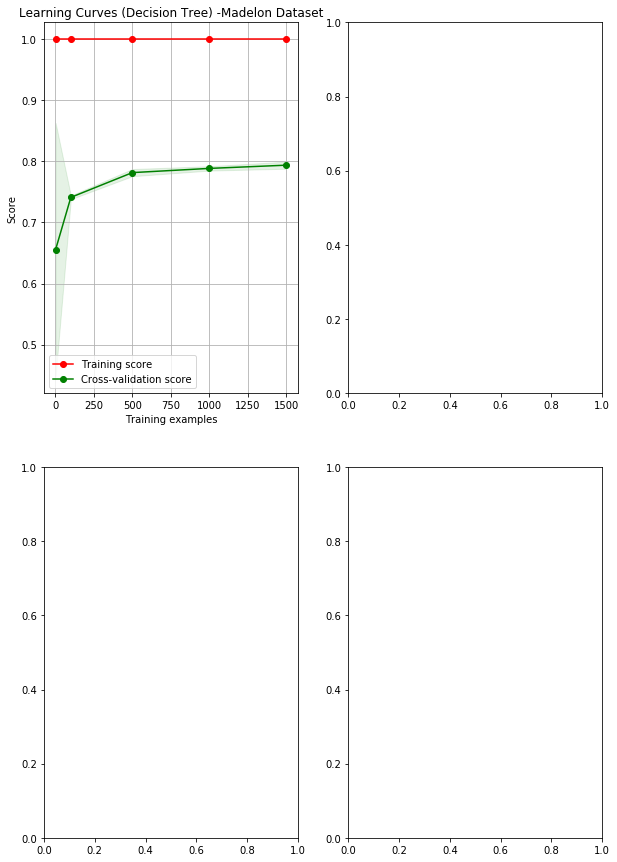

In [14]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)

result_dict ={}
model,result_dict['DT_Madelon'] = buildModel(decision_tree_fn,dfMadelon_X,dfMadelon_Y)
compare_results()
print("depth of tree:" ,model.get_depth())
print("number of leaves",model.get_n_leaves())
train_sizes = [1, 100,500, 1000, 1500]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Decision Tree) -Madelon Dataset"

plot_learning_curve(model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()


hypeparameter tuning time: 24.52006483078003 seconds
parameters:  {'max_depth': 1}
mean_test_score:  0.600625
rank:  7
parameters:  {'max_depth': 2}
mean_test_score:  0.6225
rank:  6
parameters:  {'max_depth': 4}
mean_test_score:  0.69125
rank:  5
parameters:  {'max_depth': 5}
mean_test_score:  0.72625
rank:  1
parameters:  {'max_depth': 6}
mean_test_score:  0.723125
rank:  2
parameters:  {'max_depth': 8}
mean_test_score:  0.696875
rank:  3
parameters:  {'max_depth': 10}
mean_test_score:  0.696875
rank:  3
{'accuracy': 0.8125, 'confusionmatrix': col_0     -1    1
Predict          
-1       180   24
 1        51  145}
grid search results
{'mean_fit_time': array([0.09871105, 0.20640031, 0.4558843 , 0.56710879, 0.72858357,
       0.87579   , 0.93445508]), 'std_fit_time': array([0.00315737, 0.0240025 , 0.03514844, 0.0182931 , 0.07426461,
       0.06164762, 0.04142874]), 'mean_score_time': array([0.00337787, 0.00439123, 0.00269532, 0.00355506, 0.004294  ,
       0.00478224, 0.00542108]), 's

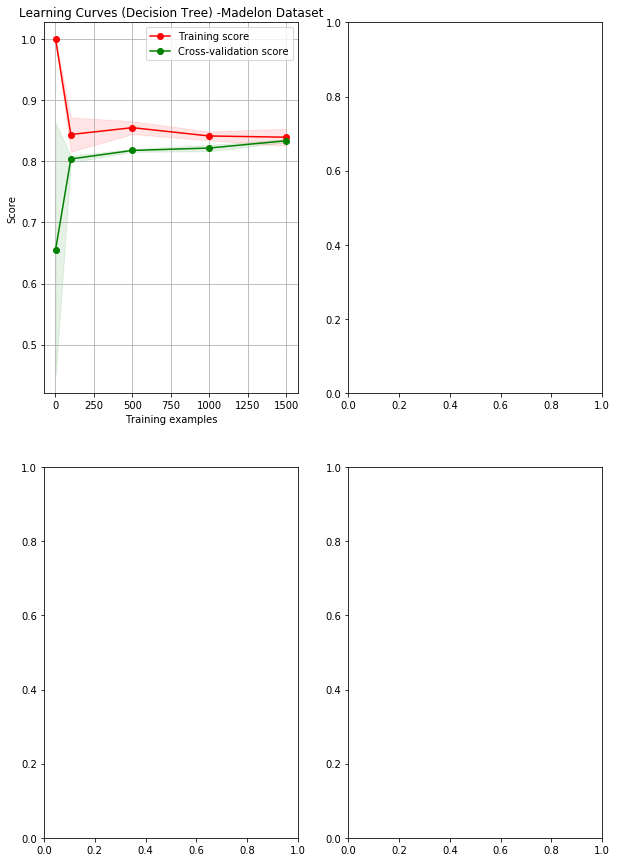

In [15]:
parameters ={'max_depth':[1,2,4,5,6,8,10]}
grid_search = grid_searchCV(dfMadelon_X, dfMadelon_Y,parameters,6)
print("grid search results")
print(grid_search.cv_results_)
print('madelon max-depth: ',grid_search.best_params_['max_depth'])
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=grid_search.best_params_['max_depth'])
X_train,X_test,Y_train,Y_test = train_test_split(dfMadelon_X, dfMadelon_Y, test_size=0.2,random_state=11)
start_time = time.time()
dt_model.fit(X_train,Y_train)
print("training time best model: ",(time.time() - start_time))
Y_pred = dt_model.predict(X_test)
print(summarise_classification(Y_test,Y_pred))
train_sizes = [1, 100,500, 1000, 1500]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))
print("depth of tree:" ,dt_model.get_depth())
print("number of leaves",dt_model.get_n_leaves())
#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Decision Tree) -Madelon Dataset"

plot_learning_curve(dt_model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()
#print(dt_model.feature_importances_)

hypeparameter tuning time: 3.951934814453125 seconds
parameters:  {'max_depth': 2, 'max_features': 'auto'}
mean_test_score:  0.51
rank:  12
parameters:  {'max_depth': 2, 'max_features': 'log2'}
mean_test_score:  0.52625
rank:  11
parameters:  {'max_depth': 4, 'max_features': 'auto'}
mean_test_score:  0.553125
rank:  5
parameters:  {'max_depth': 4, 'max_features': 'log2'}
mean_test_score:  0.53
rank:  10
parameters:  {'max_depth': 5, 'max_features': 'auto'}
mean_test_score:  0.5525
rank:  6
parameters:  {'max_depth': 5, 'max_features': 'log2'}
mean_test_score:  0.53375
rank:  9
parameters:  {'max_depth': 6, 'max_features': 'auto'}
mean_test_score:  0.58375
rank:  1
parameters:  {'max_depth': 6, 'max_features': 'log2'}
mean_test_score:  0.541875
rank:  8
parameters:  {'max_depth': 8, 'max_features': 'auto'}
mean_test_score:  0.581875
rank:  2
parameters:  {'max_depth': 8, 'max_features': 'log2'}
mean_test_score:  0.5425
rank:  7
parameters:  {'max_depth': 10, 'max_features': 'auto'}
mean

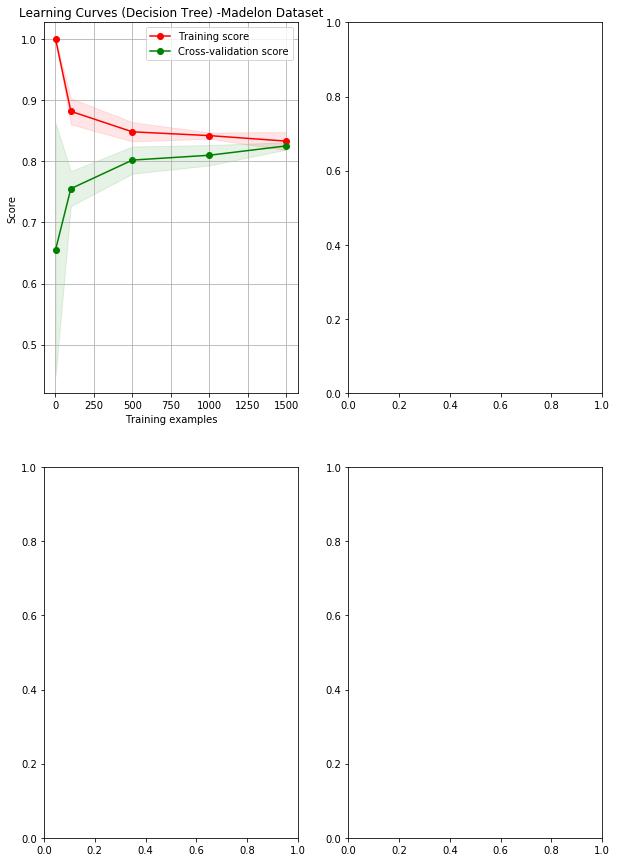

In [16]:
parameters ={'max_depth':[2,4,5,6,8,10],'max_features':['auto','log2']}
grid_search = grid_searchCV(dfMadelon_X, dfMadelon_Y,parameters,6)

dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=grid_search.best_params_['max_depth'],max_features=grid_search.best_params_['max_features'])
X_train,X_test,Y_train,Y_test = train_test_split(dfMadelon_X, dfMadelon_Y, test_size=0.2,random_state=11)
start_time = time.time()
dt_model.fit(X_train,Y_train)
print("training time best model: ",(time.time() - start_time))
Y_pred = dt_model.predict(X_test)
summarise_classification(Y_test,Y_pred)
train_sizes = [1, 100,500, 1000, 1500]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Decision Tree) -Madelon Dataset"

plot_learning_curve(dt_model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()
#print(dt_model.feature_importances_)